In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
enquiry_data_path = "Original Data/Enquiry_data.csv"
pincode_data_path = "Original Data/pin_sheet.csv"

In [3]:
enquiry_df = pd.read_csv(enquiry_data_path)
pincode_df = pd.read_csv(pincode_data_path)

In [4]:
enquiry_df.shape

(386138, 49)

### Data cleaning =  Duplicate rows

In [5]:
enquiry_df = enquiry_df.drop_duplicates()
enquiry_df.shape

(384117, 49)

In [6]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384117 entries, 0 to 386137
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DocName                   384117 non-null  object 
 1   DocDate                   384116 non-null  object 
 2   DocTime                   384112 non-null  object 
 3   Month                     384112 non-null  object 
 4   Day                       384114 non-null  object 
 5   Week                      384113 non-null  object 
 6   BookingNo                 352643 non-null  object 
 7   DealerCity                347183 non-null  object 
 8   DealerState               383980 non-null  object 
 9   BranchType                384077 non-null  object 
 10  LeadType                  384114 non-null  object 
 11  PaymentMode               384017 non-null  object 
 12  State                     383582 non-null  object 
 13  City                      384040 non-null  o

### Data cleaning =  Columns with >80% null values

In [6]:
null_cols = ['Color','CurrentTwoWheeler','CurrentFourWheeler','OwnershipStatus',
             'MaritalStatus','EducationalQualification','HouseholdIncome','LostToModel',
             'InsuranceCompany','ActualFollowUpDate','LostRemarks']
enquiry_df = enquiry_df.drop(null_cols,axis=1)
enquiry_df.shape

(384117, 38)

In [7]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384117 entries, 0 to 386137
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DocName          384117 non-null  object 
 1   DocDate          384116 non-null  object 
 2   DocTime          384112 non-null  object 
 3   Month            384112 non-null  object 
 4   Day              384114 non-null  object 
 5   Week             384113 non-null  object 
 6   BookingNo        352643 non-null  object 
 7   DealerCity       347183 non-null  object 
 8   DealerState      383980 non-null  object 
 9   BranchType       384077 non-null  object 
 10  LeadType         384114 non-null  object 
 11  PaymentMode      384017 non-null  object 
 12  State            383582 non-null  object 
 13  City             384040 non-null  object 
 14  Pin              384074 non-null  float64
 15  ModelFamily      384111 non-null  object 
 16  Make             384111 non-null  obje

### Data cleaning =  Columns with wrong data

In [8]:
wrong_cols = ['OverallRating','Style','PickUp','Features','Ridecomfort']
enquiry_df = enquiry_df.drop(wrong_cols,axis=1)
enquiry_df.shape

(384117, 33)

In [9]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384117 entries, 0 to 386137
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DocName          384117 non-null  object 
 1   DocDate          384116 non-null  object 
 2   DocTime          384112 non-null  object 
 3   Month            384112 non-null  object 
 4   Day              384114 non-null  object 
 5   Week             384113 non-null  object 
 6   BookingNo        352643 non-null  object 
 7   DealerCity       347183 non-null  object 
 8   DealerState      383980 non-null  object 
 9   BranchType       384077 non-null  object 
 10  LeadType         384114 non-null  object 
 11  PaymentMode      384017 non-null  object 
 12  State            383582 non-null  object 
 13  City             384040 non-null  object 
 14  Pin              384074 non-null  float64
 15  ModelFamily      384111 non-null  object 
 16  Make             384111 non-null  obje

### Data cleaning =  Columns not useful for prediction

In [10]:
useless_cols = ['DocDate','DocTime','Month','Day','Week','BookingNo',
                'SaleChannel','FollowUpDate','Make','SubSource']
enquiry_df = enquiry_df.drop(useless_cols,axis=1)
enquiry_df.shape

(384117, 23)

In [11]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384117 entries, 0 to 386137
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DocName          384117 non-null  object 
 1   DealerCity       347183 non-null  object 
 2   DealerState      383980 non-null  object 
 3   BranchType       384077 non-null  object 
 4   LeadType         384114 non-null  object 
 5   PaymentMode      384017 non-null  object 
 6   State            383582 non-null  object 
 7   City             384040 non-null  object 
 8   Pin              384074 non-null  float64
 9   ModelFamily      384111 non-null  object 
 10  ModelCode        384111 non-null  object 
 11  TotalAmount      384111 non-null  float64
 12  TestRideOffered  331934 non-null  object 
 13  Occupation       1197 non-null    object 
 14  DOB              49388 non-null   object 
 15  LeadStatus       384111 non-null  object 
 16  LeadLostReason   26765 non-null   obje

### Drop duplicates again

In [12]:
enquiry_df.shape

(384117, 23)

In [13]:
enquiry_df = enquiry_df.drop_duplicates()
enquiry_df.shape

(384081, 23)

### Data cleaning = Enquiry column

In [14]:
for length in range(0,30):
    print(length,":",len(enquiry_df['DocName'][enquiry_df['DocName'].str.len()==length]))
    display(enquiry_df['DocName'][enquiry_df['DocName'].str.len()==length])

0 : 0


Series([], Name: DocName, dtype: object)

1 : 0


Series([], Name: DocName, dtype: object)

2 : 2


7211     \r\n
16331    \r\n
Name: DocName, dtype: object

3 : 0


Series([], Name: DocName, dtype: object)

4 : 0


Series([], Name: DocName, dtype: object)

5 : 0


Series([], Name: DocName, dtype: object)

6 : 0


Series([], Name: DocName, dtype: object)

7 : 0


Series([], Name: DocName, dtype: object)

8 : 0


Series([], Name: DocName, dtype: object)

9 : 0


Series([], Name: DocName, dtype: object)

10 : 0


Series([], Name: DocName, dtype: object)

11 : 0


Series([], Name: DocName, dtype: object)

12 : 0


Series([], Name: DocName, dtype: object)

13 : 2


40365    ,,,,Showroom"
69086    ,,,,Showroom"
Name: DocName, dtype: object

14 : 3


4201     ENQ11214201261
14736    ENQ10167201247
49618    ENQ11214201231
Name: DocName, dtype: object

15 : 37


2204     ENQ112142012261
5811     ENQ112072012844
7863     ENQ101672012116
8039     DENQ11214201281
12541    ENQ112072012633
13113    ENQ112142012178
13807    ENQ101672012708
14735    ENQ112142012522
15758    ENQ112142012690
18538    ENQ112142012436
19479    ENQ112142012456
21110    ENQ112072012817
21841    ,2nd Follow up"
25833    ENQ112072012628
29772    ENQ112142012608
30831    ENQ112142012442
30892    ENQ101672012228
31708    ENQ112142012772
32088    ENQ112142012710
33070    ENQ112142012495
34348    ENQ112072012481
34962    ENQ101672012367
37534    ENQ112072012336
38545    ENQ112142012404
45443    ENQ101672012263
46166    ENQ101672012935
47731    ENQ112072012332
48030    ENQ112142012187
50751    ENQ112072012427
54610    ENQ112142012251
55471    ENQ101672012659
56968    ENQ101672012908
65039    ENQ112142012649
65788    ENQ112072012849
74888    ENQ112072012388
76315    ENQ112142012413
78275    ENQ112142012173
Name: DocName, dtype: object

16 : 1468


123       BENQ115811700019
290       BENQ106321800064
359       BENQ116551800017
449       BENQ118121700005
578       ENQIN01201801073
                ...       
384361    ENQHN01201800489
384544    ENQIN01201801091
384717    ENQIN01201801101
384908    ENQHN01201800520
385503    ENQIN01201801145
Name: DocName, Length: 1468, dtype: object

17 : 120510


1         ENQ10209201700861
13        ENQ12051201702593
16        ENQ12061201601730
19        ENQ12138201601941
26        ENQ10734201400564
                ...        
386127    ENQ11824201802626
386129    ENQ11912201802594
386132    ENQBRN01201800110
386133    ENQBRN01201800111
386134    ENQ11941201802120
Name: DocName, Length: 120510, dtype: object

18 : 171325


2         ENQ100602016012972
4         ENQ114692015000258
5         ENQ115482016000180
8         ENQ114322016000910
9         ENQ102722014002231
                 ...        
386128    DENQBRN05201800082
386130    DENQ11806201802109
386131    DENQ11863201800901
386136    DENQBRN01201800101
386137    DENQBRN01201800102
Name: DocName, Length: 171325, dtype: object

19 : 69848


0         DENQ100572014000277
6         DENQ102002015001992
7         DENQ109492014000114
11        DENQ117262015000170
14        DENQ114122014001483
                 ...         
385298    ENQTN10639201800469
385323    ENQWF11401201800953
385608    ENQNW10639201802033
385856    ENQ10031B2201800771
385974    ENQ10031B2201800790
Name: DocName, Length: 69848, dtype: object

20 : 940


283       ENQ10047BN2201701116
686       DENQNW10639201600568
1336      DENQNW10639201601102
1677      ENQ10047BN2201701877
1732      DENQNW10639201400009
                  ...         
384685    ENQ10721VLR201801218
385112    ENQ10047BN4201800272
385270    ENQ10721VLR201801256
385860    ENQ10047BN4201800292
385993    ENQ10047BN4201800293
Name: DocName, Length: 940, dtype: object

21 : 638


10        ENQPR0110173201600446
1734      ENQ10937BRN0420161350
2063      ENQ10937BRN0420160353
2767      ENQPR0110173201600171
3343      ENQPR0110173201800808
                  ...          
385084    DENQ10047BN2201800323
385529    DENQ10047BN2201800350
385541    DENQ10047BN2201800351
385659    DENQ10047BN2201800356
385999    DENQ10047BN3201800554
Name: DocName, Length: 638, dtype: object

22 : 12687


3         ENQ10411BRN01201705686
20        ENQ0000028292201800786
30        ENQ0000011476201801858
31        ENQ10411BRN01201512906
75        ENQ0000026977201701293
                   ...          
385995    ENQ0000027620201800291
385996    ENQ0000027620201800292
386042    ENQ0000028292201801556
386116    ENQ10937BRN01201800740
386135    ENQ0000028851201800580
Name: DocName, Length: 12687, dtype: object

23 : 5239


21        DENQ10268ASC01201400074
116       DENQ0000028292201500552
132       ENQ10408BRN022016000138
222       DENQ12084BRN01201400010
423       DENQ0000026977201600250
                   ...           
385802    DENQ10408BRN01201800378
385865    DENQ0000065703201800170
385912    DENQ0000027620201800108
385917    DENQ11031BRN01201800327
386006    DENQ11716BRN03201800333
Name: DocName, Length: 5239, dtype: object

24 : 1382


12        DENQ00000298992015000479
42        DENQ10408BRN012016000808
1428      DENQ10408BRN022016000503
1697      DENQ10408BRN022015000592
1890      DENQ11716BRN042014000024
                    ...           
253195    DENQ11716BRN042017000076
253196    DENQ10416BRN022017000102
253247    DENQ00000298992017000158
254188    DENQ11716BRN022017000044
257214    DENQ10001BRN012017000095
Name: DocName, Length: 1382, dtype: object

25 : 0


Series([], Name: DocName, dtype: object)

26 : 0


Series([], Name: DocName, dtype: object)

27 : 0


Series([], Name: DocName, dtype: object)

28 : 0


Series([], Name: DocName, dtype: object)

29 : 0


Series([], Name: DocName, dtype: object)

In [15]:
def extract_string(x):
    x = "".join(re.findall("[a-zA-Z]*", x)[0])
    return x

valid_enq = pd.Series(list(map(extract_string,enquiry_df['DocName']))).value_counts().index.tolist()
del valid_enq[23]

In [16]:
valid_enq

['ENQ',
 'DENQ',
 'ENQBRN',
 'DENQBRN',
 'DENQNW',
 'BENQ',
 'ENQIN',
 'ENQPR',
 'ENQKR',
 'ENQMH',
 'ENQNW',
 'ENQWF',
 'WENQ',
 'ENQHK',
 'ENQBS',
 'DENQTN',
 'DENQDB',
 'ENQDB',
 'DENQsd',
 'DENQBS',
 'ENQTN',
 'PRENQ',
 'DENQHK',
 'ENQBRMC',
 'ENQHN',
 'DENQBRMC',
 'DENQKR',
 'DENQBR',
 'DENQWF',
 '',
 'WENQWF',
 'DENQRN',
 'DENQPR',
 'VMLDD',
 'DENQBAR',
 'DENQMH',
 'WDENQWF',
 'DENQATM',
 'WENQKR']

In [17]:
enquiry_df['DocName'].str[:4].value_counts()

ENQ1    228756
DENQ    140476
ENQ0      4546
ENQB      3769
ENQ2      3181
ENQ6      1067
BENQ       347
ENQI       280
ENQP       242
ENQK       233
ENQM       219
ENQN       215
ENQW       204
WENQ       175
ENQH       158
ENQD        78
ENQT        58
PREN        39
WDEN        28
VMLD         4
\r\n         2
,,,,         2
,2nd         1
,Gen         1
Name: DocName, dtype: int64

In [18]:
enquiry_df.shape

(384081, 23)

In [19]:
def get_valid_enq(x):
    x = x.startswith(tuple(valid_enq))
    return x

enquiry_df = enquiry_df[list(map(get_valid_enq,enquiry_df['DocName']))]
enquiry_df.shape

(384081, 23)

In [20]:
enquiry_df['DocName'].str[:4].value_counts()

ENQ1    228756
DENQ    140476
ENQ0      4546
ENQB      3769
ENQ2      3181
ENQ6      1067
BENQ       347
ENQI       280
ENQP       242
ENQK       233
ENQM       219
ENQN       215
ENQW       204
WENQ       175
ENQH       158
ENQD        78
ENQT        58
PREN        39
WDEN        28
VMLD         4
\r\n         2
,,,,         2
,2nd         1
,Gen         1
Name: DocName, dtype: int64

In [164]:
enquiry_df.isna().sum()

DocName                 0
DocDate                 0
DocTime                 0
Month                   0
Day                     0
Week                    0
BookingNo           29449
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
Make                    0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         345663
DOB                302991
LeadStatus              0
LeadLostReason          0
SaleChannel             0
FollowUp                0
FollowUpDate          434
CustomerAge        297561
SourceOfEnquiry         0
SubSource          327539
FollowUpDone            0
dtype: int64

### Data cleaning = DealerCity

In [21]:
new_enq = enquiry_df.copy()
new_enq['DealerCity'] = new_enq['DealerCity'].str.replace("COCHIN","KOCHI").tolist()
enquiry_df['DealerCity'] = enquiry_df['DealerCity'].str.replace("COCHIN","KOCHI").tolist()

### Data cleaning =  DealerState

In [22]:
enquiry_df[enquiry_df['DealerState'].isna()][['DealerCity','DealerState']]

DealerCity DealerState
827         KOCHI         NaN
5167        BIDAR         NaN
7211          NaN         NaN
9286        BIDAR         NaN
10207       BIDAR         NaN
...           ...         ...
157157      KOCHI         NaN
160221      KOCHI         NaN
160223      KOCHI         NaN
171772      KOCHI         NaN
172625      KOCHI         NaN

[137 rows x 2 columns]

In [24]:
temp_city_state = sorted(enquiry_df[['DealerCity','DealerState']].groupby(['DealerCity','DealerState']).size().to_dict().keys())
city_state = dict()
for city,state in temp_city_state:
    city_state[city] = state
city_state

{'ABOHAR': 'Punjab',
 'ADILABAD': 'Telangana',
 'AGARTALA': 'Tripura',
 'AGRA': 'Uttar Pradesh',
 'AHMEDABAD': 'Gujarat',
 'AHMEDNAGAR': 'Maharashtra',
 'AIZAWAL': 'Mizoram',
 'AJNALA': 'Punjab',
 'AKBARPUR': 'Uttar Pradesh',
 'AKOLA': 'Maharashtra',
 'ALIBAG': 'Maharashtra',
 'ALIGARH': 'Uttar Pradesh',
 'ALLAHABAD': 'Uttar Pradesh',
 'ALLEPPEY': 'Kerala',
 'ALWAR': 'Rajasthan',
 'ALWAYE': 'Kerala',
 'AMALAPURAM (M)': 'Andhra Pradesh',
 'AMBALA': 'Haryana',
 'AMBEDKAR NAGAR': 'Uttar Pradesh',
 'AMBIKAPUR': 'Chattisgarh',
 'AMRAVATI': 'Maharashtra',
 'AMRELI': 'Gujarat',
 'AMRITSAR': 'Punjab',
 'AMROHA': 'Uttar Pradesh',
 'ANAND': 'Gujarat',
 'ANANTPUR': 'Andhra Pradesh',
 'ANGUL': 'Odisha',
 'ANKLESHWAR': 'Gujarat',
 'ARRAH': 'Bihar',
 'ASANSOL': 'West Bengal',
 'ATRU': 'Rajasthan',
 'AURANGABAD': 'Maharashtra',
 'AURANGABAD (M)': 'Bihar',
 'AURIMORE': 'Uttar Pradesh',
 'AZAMGARH': 'Uttar Pradesh',
 'Ashok Nagar (M)': 'Madhya Pradesh',
 'Assandh (MC)': 'Haryana',
 'BAGALKOT': 'Karnata

In [25]:
new_enq['DealerState'][new_enq['DealerState'].isna()] = new_enq['DealerCity'].map(city_state)
new_state = new_enq['DealerState']
old_state = enquiry_df['DealerState']
old_state = old_state.fillna(new_state)

In [26]:
enquiry_df['DealerState'] = old_state
enquiry_df.shape

(384081, 23)

In [27]:
enquiry_df.isna().sum()

DocName                 0
DealerCity          36932
DealerState             4
BranchType             40
LeadType                3
PaymentMode           100
State                 535
City                   77
Pin                    43
ModelFamily             6
ModelCode               6
TotalAmount             6
TestRideOffered     52182
Occupation         382884
DOB                334697
LeadStatus              6
LeadLostReason     357317
FinanceCompany     297285
FollowUpRemarks    367441
FollowUp               73
CustomerAge        329161
SourceOfEnquiry    251481
FollowUpDone            6
dtype: int64

### Data cleaning = BranchType

In [28]:
temp_city_branch = sorted(enquiry_df[['DealerCity','BranchType']].groupby(['DealerCity','BranchType']).size().to_dict().keys())
city_branch = dict()
for city,branch in temp_city_branch:
    city_branch[city] = branch
city_branch

{'ABOHAR': 'Urban',
 'ADILABAD': 'Urban',
 'AGARTALA': 'Urban',
 'AGRA': 'Urban',
 'AHMEDABAD': 'Urban',
 'AHMEDNAGAR': 'Urban',
 'AIZAWAL': 'Rural',
 'AJNALA': 'Urban',
 'AKBARPUR': 'Urban',
 'AKOLA': 'Urban',
 'ALIBAG': 'Urban',
 'ALIGARH': 'Urban',
 'ALLAHABAD': 'Urban',
 'ALLEPPEY': 'Urban',
 'ALWAR': 'Urban',
 'ALWAYE': 'Urban',
 'AMALAPURAM (M)': 'Urban',
 'AMBALA': 'Urban',
 'AMBEDKAR NAGAR': 'Urban',
 'AMBIKAPUR': 'Urban',
 'AMRAVATI': 'Urban',
 'AMRELI': 'Urban',
 'AMRITSAR': 'Urban',
 'AMROHA': 'Urban',
 'ANAND': 'Urban',
 'ANANTPUR': 'Urban',
 'ANGUL': 'Urban',
 'ANKLESHWAR': 'Urban',
 'ARRAH': 'Urban',
 'ASANSOL': 'Urban',
 'ATRU': 'Urban',
 'AURANGABAD': 'Urban',
 'AURANGABAD (M)': 'Urban',
 'AURIMORE': 'Urban',
 'AZAMGARH': 'Urban',
 'Ashok Nagar (M)': 'Urban',
 'Assandh (MC)': 'Urban',
 'BAGALKOT': 'Urban',
 'BAGRU': 'Rural',
 'BAHRAICH': 'Urban',
 'BAIKUNTHPUR (NAC)': 'Urban',
 'BALAGHAT': 'Urban',
 'BALASORE': 'Urban',
 'BALLABGARH': 'Urban',
 'BALLIA': 'Urban',
 'BALR

In [29]:
new_enq['BranchType'][new_enq['BranchType'].isna()] = new_enq['DealerCity'].map(city_branch)
new_branch = new_enq['BranchType']
old_branch = enquiry_df['BranchType']
old_branch = old_branch.fillna(new_branch)

In [30]:
enquiry_df['BranchType'] = old_branch
enquiry_df.shape

(384081, 23)

In [31]:
enquiry_df.isna().sum()

DocName                 0
DealerCity          36932
DealerState             4
BranchType              4
LeadType                3
PaymentMode           100
State                 535
City                   77
Pin                    43
ModelFamily             6
ModelCode               6
TotalAmount             6
TestRideOffered     52182
Occupation         382884
DOB                334697
LeadStatus              6
LeadLostReason     357317
FinanceCompany     297285
FollowUpRemarks    367441
FollowUp               73
CustomerAge        329161
SourceOfEnquiry    251481
FollowUpDone            6
dtype: int64

### Data cleaning = DealerCity

In [32]:
enquiry_df = enquiry_df.dropna(subset=['DealerCity'])
enquiry_df.shape

(347149, 23)

In [33]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             1
BranchType              1
LeadType                1
PaymentMode            85
State                 530
City                   72
Pin                    38
ModelFamily             1
ModelCode               1
TotalAmount             1
TestRideOffered     48952
Occupation         345971
DOB                303287
LeadStatus              1
LeadLostReason     322450
FinanceCompany     268068
FollowUpRemarks    332134
FollowUp               68
CustomerAge        297790
SourceOfEnquiry    226509
FollowUpDone            1
dtype: int64

### Data cleaning = PaymentMode

In [34]:
enquiry_df['PaymentMode'].value_counts()

Finance    189011
Cash       158053
Name: PaymentMode, dtype: int64

In [35]:
enquiry_df[enquiry_df['PaymentMode'].isna()][['PaymentMode','FinanceCompany']].dropna(subset=['FinanceCompany'])

Empty DataFrame
Columns: [PaymentMode, FinanceCompany]
Index: []

In [36]:
enquiry_df['PaymentMode'] = enquiry_df['PaymentMode'].fillna("Cash")
enquiry_df.shape

(347149, 23)

In [37]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             1
BranchType              1
LeadType                1
PaymentMode             0
State                 530
City                   72
Pin                    38
ModelFamily             1
ModelCode               1
TotalAmount             1
TestRideOffered     48952
Occupation         345971
DOB                303287
LeadStatus              1
LeadLostReason     322450
FinanceCompany     268068
FollowUpRemarks    332134
FollowUp               68
CustomerAge        297790
SourceOfEnquiry    226509
FollowUpDone            1
dtype: int64

### Data Cleaning = TotalAmount

In [38]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347149 entries, 0 to 386137
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DocName          347149 non-null  object 
 1   DealerCity       347149 non-null  object 
 2   DealerState      347148 non-null  object 
 3   BranchType       347148 non-null  object 
 4   LeadType         347148 non-null  object 
 5   PaymentMode      347149 non-null  object 
 6   State            346619 non-null  object 
 7   City             347077 non-null  object 
 8   Pin              347111 non-null  float64
 9   ModelFamily      347148 non-null  object 
 10  ModelCode        347148 non-null  object 
 11  TotalAmount      347148 non-null  float64
 12  TestRideOffered  298197 non-null  object 
 13  Occupation       1178 non-null    object 
 14  DOB              43862 non-null   object 
 15  LeadStatus       347148 non-null  object 
 16  LeadLostReason   24699 non-null   obje

In [41]:
enquiry_df = enquiry_df.dropna(subset = ['TotalAmount'])

In [42]:
enquiry_df['TotalAmount'] = enquiry_df['TotalAmount'].astype(int)
enquiry_df.shape

(347148, 23)

In [43]:
# Get a list of medians for all model families
price_median_dict = enquiry_df.groupby('ModelFamily')['TotalAmount'].median().to_dict()
price_median_dict

{'Apache': 78218,
 'Boxer': 43461,
 'CBZ': 64159,
 'Discover': 53114,
 'Intruder': 85763,
 'RE': 156269,
 'Splendor': 37060,
 'Star city': 46475}

In [44]:
# Extract 85% quantile value for each model family
high_quantile = 0.85
price_high_quantile_dict = dict()
for model in price_median_dict.keys():
    price_high_quantile_dict[model] = enquiry_df[enquiry_df['ModelFamily']==model]['TotalAmount'].quantile(high_quantile)
    
price_high_quantile_dict

{'Apache': 96576.0,
 'Boxer': 49979.55,
 'CBZ': 70704.0,
 'Discover': 59738.0,
 'Intruder': 93632.0,
 'RE': 162073.0,
 'Splendor': 40499.0,
 'Star city': 47788.0}

In [45]:
# Extract 1% quantile value for each model family
low_quantile = 0.01
price_low_quantile_dict = dict()
for model in price_median_dict.keys():
    price_low_quantile_dict[model] = enquiry_df[enquiry_df['ModelFamily']==model]['TotalAmount'].quantile(low_quantile)
    
price_low_quantile_dict

{'Apache': 60389.0,
 'Boxer': 40705.64,
 'CBZ': 55060.0,
 'Discover': 45053.0,
 'Intruder': 74443.0,
 'RE': 140517.44,
 'Splendor': 29989.0,
 'Star city': 39868.0}

In [46]:
# Checking if the value changes or not for higher quantile range
enquiry_df.loc[(enquiry_df['ModelFamily']=="Apache") & 
              (enquiry_df['TotalAmount'] > 141785.80000000037)]['TotalAmount']

251       142689
440       141843
526       149201
588       151789
636       167914
           ...  
384447    145491
384448    145491
384814    147244
384815    147244
385135    146867
Name: TotalAmount, Length: 2044, dtype: int32

In [47]:
# Checking if the value changes or not for lower quantile range 
enquiry_df.loc[(enquiry_df['ModelFamily']=="Apache") & 
              (enquiry_df['TotalAmount'] < 60312.0)]['TotalAmount']

310       59544
478       59736
625           0
2130      59992
2321      59300
          ...  
315646    58992
315783    59480
315802    59112
315912    58681
323028    58735
Name: TotalAmount, Length: 1209, dtype: int32

In [48]:
# Change all upper quantile values to median
for model in price_median_dict.keys():
    enquiry_df.loc[(enquiry_df['ModelFamily']==model) & 
              (enquiry_df['TotalAmount'] > price_high_quantile_dict[model]),'TotalAmount'] = price_median_dict[model]

In [49]:
# Change all lower quantile values to median
for model in price_median_dict.keys():
    enquiry_df.loc[(enquiry_df['ModelFamily']==model) & 
              (enquiry_df['TotalAmount'] < price_low_quantile_dict[model]),'TotalAmount'] = price_median_dict[model]

In [50]:
# Check if value has changed or not
enquiry_df.loc[310,'TotalAmount']

78218

In [51]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347148 entries, 0 to 386137
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DocName          347148 non-null  object 
 1   DealerCity       347148 non-null  object 
 2   DealerState      347148 non-null  object 
 3   BranchType       347148 non-null  object 
 4   LeadType         347148 non-null  object 
 5   PaymentMode      347148 non-null  object 
 6   State            346618 non-null  object 
 7   City             347076 non-null  object 
 8   Pin              347110 non-null  float64
 9   ModelFamily      347148 non-null  object 
 10  ModelCode        347148 non-null  object 
 11  TotalAmount      347148 non-null  int32  
 12  TestRideOffered  298197 non-null  object 
 13  Occupation       1178 non-null    object 
 14  DOB              43862 non-null   object 
 15  LeadStatus       347148 non-null  object 
 16  LeadLostReason   24699 non-null   obje

### Data Cleaning = State and City

In [52]:
pincode_df = pincode_df[['pincode','Districtname','statename']]
pincode_df.columns = ['Pin','City','State']
pincode_df['Pin'] = pincode_df['Pin'].astype(str)
pincode_df

Pin            City                      State
0       744302         Nicobar  ANDAMAN & NICOBAR ISLANDS
1       744301         Nicobar  ANDAMAN & NICOBAR ISLANDS
2       744303         Nicobar  ANDAMAN & NICOBAR ISLANDS
3       744303         Nicobar  ANDAMAN & NICOBAR ISLANDS
4       744302         Nicobar  ANDAMAN & NICOBAR ISLANDS
...        ...             ...                        ...
154792  721148  West Midnapore                WEST BENGAL
154793  721641  West Midnapore                WEST BENGAL
154794  721153  West Midnapore                WEST BENGAL
154795  721153  West Midnapore                WEST BENGAL
154796  721130  West Midnapore                WEST BENGAL

[154797 rows x 3 columns]

In [53]:
pincode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154797 entries, 0 to 154796
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Pin     154797 non-null  object
 1   City    154761 non-null  object
 2   State   154761 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


In [54]:
pinclean_df = pincode_df.copy()
pinclean_df['Pin'] =pincode_df['Pin'].str.strip().str[:3]

In [55]:
pinclean_df = pinclean_df.groupby('Pin').first()

In [56]:
citypin_dict = pinclean_df.to_dict()['City']
statepin_dict = pinclean_df.to_dict()['State']

In [57]:
citypin_dict

{'110': 'Central Delhi',
 '121': 'Faridabad',
 '122': 'Gurgaon',
 '123': 'Gurgaon',
 '124': 'Jhajjar',
 '125': 'Fatehabad',
 '126': 'Jind',
 '127': 'Bhiwani',
 '131': 'Sonipat',
 '132': 'Karnal',
 '133': 'Ambala',
 '134': 'Ambala',
 '135': 'Yamuna Nagar',
 '136': 'Kaithal',
 '140': 'Chandigarh',
 '141': 'Fatehgarh Sahib',
 '142': 'Firozpur',
 '143': 'Amritsar',
 '144': 'Hoshiarpur',
 '145': 'Gurdaspur',
 '146': 'Hoshiarpur',
 '147': 'Fatehgarh Sahib',
 '148': 'Barnala',
 '151': 'Bathinda',
 '152': 'Faridkot',
 '160': 'Chandigarh',
 '171': 'Shimla',
 '172': 'Kinnaur',
 '173': 'Shimla',
 '174': 'Bilaspur (HP)',
 '175': 'Kangra',
 '176': 'Chamba',
 '177': 'Bilaspur (HP)',
 '180': 'Jammu',
 '181': 'Jammu',
 '182': 'Doda',
 '184': 'Jammu',
 '185': 'Jammu',
 '190': 'Budgam',
 '191': 'Ananthnag',
 '192': 'Ananthnag',
 '193': 'Ananthnag',
 '194': 'Kargil',
 '201': 'Gautam Buddha Nagar',
 '202': 'Agra',
 '203': 'Bulandshahr',
 '204': 'Aligarh',
 '205': 'Firozabad',
 '206': 'Auraiya',
 '207': 'E

In [58]:
statepin_dict

{'110': 'DELHI',
 '121': 'HARYANA',
 '122': 'HARYANA',
 '123': 'HARYANA',
 '124': 'HARYANA',
 '125': 'HARYANA',
 '126': 'HARYANA',
 '127': 'HARYANA',
 '131': 'HARYANA',
 '132': 'HARYANA',
 '133': 'HARYANA',
 '134': 'HARYANA',
 '135': 'HARYANA',
 '136': 'HARYANA',
 '140': 'CHANDIGARH',
 '141': 'PUNJAB',
 '142': 'PUNJAB',
 '143': 'PUNJAB',
 '144': 'PUNJAB',
 '145': 'PUNJAB',
 '146': 'PUNJAB',
 '147': 'PUNJAB',
 '148': 'PUNJAB',
 '151': 'PUNJAB',
 '152': 'PUNJAB',
 '160': 'CHANDIGARH',
 '171': 'HIMACHAL PRADESH',
 '172': 'HIMACHAL PRADESH',
 '173': 'HIMACHAL PRADESH',
 '174': 'HIMACHAL PRADESH',
 '175': 'HIMACHAL PRADESH',
 '176': 'HIMACHAL PRADESH',
 '177': 'HIMACHAL PRADESH',
 '180': 'JAMMU & KASHMIR',
 '181': 'JAMMU & KASHMIR',
 '182': 'JAMMU & KASHMIR',
 '184': 'JAMMU & KASHMIR',
 '185': 'JAMMU & KASHMIR',
 '190': 'JAMMU & KASHMIR',
 '191': 'JAMMU & KASHMIR',
 '192': 'JAMMU & KASHMIR',
 '193': 'JAMMU & KASHMIR',
 '194': 'JAMMU & KASHMIR',
 '201': 'UTTAR PRADESH',
 '202': 'UTTAR PRADES

In [59]:
enquiry_df['Pin'] = enquiry_df['Pin'].astype(str)

In [60]:
enquiry_df['Pin'] = enquiry_df['Pin'].str.strip().str[:3]
enquiry_df.loc[enquiry_df['Pin']=='220','Pin'] = '226'
enquiry_df.loc[enquiry_df['Pin']=='255','Pin'] = '250'
enquiry_df.loc[enquiry_df['Pin']=='1.0','Pin'] = '384'
enquiry_df.loc[enquiry_df['Pin']=='111','Pin'] = '682'
enquiry_df.loc[enquiry_df['Pin']=='150','Pin'] = '160'
enquiry_df.loc[enquiry_df['Pin']=='165','Pin'] = '534'
enquiry_df.loc[enquiry_df['Pin']=='269','Pin'] = '629'
enquiry_df.loc[enquiry_df['Pin']=='270','Pin'] = '233'
enquiry_df.loc[enquiry_df['Pin']=='287','Pin'] = '387'
enquiry_df.loc[enquiry_df['Pin']=='310','Pin'] = '301'
enquiry_df.loc[enquiry_df['Pin']=='386','Pin'] = '363'
enquiry_df.loc[enquiry_df['Pin']=='426','Pin'] = '423'
enquiry_df.loc[enquiry_df['Pin']=='467','Pin'] = '476'
enquiry_df.loc[enquiry_df['Pin']=='519','Pin'] = '380'
enquiry_df.loc[enquiry_df['Pin']=='565','Pin'] = '560'
enquiry_df.loc[enquiry_df['Pin']=='615','Pin'] = '613'
enquiry_df.loc[enquiry_df['Pin']=='645','Pin'] = '610'
enquiry_df.loc[enquiry_df['Pin']=='654','Pin'] = '610'
enquiry_df.loc[enquiry_df['Pin']=='665','Pin'] = '685'
enquiry_df.loc[enquiry_df['Pin']=='747','Pin'] = '842'
enquiry_df.loc[enquiry_df['Pin']=='789','Pin'] = '785'
enquiry_df.loc[enquiry_df['Pin']=='839','Pin'] = '834'
enquiry_df.loc[enquiry_df['Pin']=='900','Pin'] = '700'
enquiry_df.loc[enquiry_df['Pin']=='925','Pin'] = '305'
enquiry_df.loc[enquiry_df['Pin']=='947','Pin'] = '847'
enquiry_df.loc[enquiry_df['Pin']=='977','Pin'] = '799'
enquiry_df.loc[enquiry_df['Pin']=='987','Pin'] = '676'
enquiry_df.loc[enquiry_df['Pin']=='999','Pin'] = '700'
enquiry_df.loc[enquiry_df['City']=='Bongaigaon','Pin'] = '783'
enquiry_df.loc[enquiry_df['City']=='Moranhat','Pin'] = '785'
enquiry_df.loc[enquiry_df['City']=='Guwahati','Pin'] = '781'
enquiry_df.loc[enquiry_df['City']=='Tezpur','Pin'] = '784'
enquiry_df.loc[enquiry_df['City']=='Lakhipur','Pin'] = '788'
enquiry_df.loc[enquiry_df['City']=='Imphal','Pin'] = '795'
enquiry_df['Pin']

0         641
1         795
2         614
3         560
4         246
         ... 
386133    577
386134    226
386135    676
386136    483
386137    483
Name: Pin, Length: 347148, dtype: object

In [61]:
enquiry_df['City'] = enquiry_df['Pin'].map(citypin_dict)
enquiry_df['State'] = enquiry_df['Pin'].map(statepin_dict)

In [62]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                 246
City                  246
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered     48951
Occupation         345970
DOB                303286
LeadStatus              0
LeadLostReason     322449
FinanceCompany     268067
FollowUpRemarks    332133
FollowUp               67
CustomerAge        297789
SourceOfEnquiry    226508
FollowUpDone            0
dtype: int64

In [63]:
enquiry_df.shape

(347148, 23)

In [64]:
enquiry_df = enquiry_df.dropna(subset=['City'])
enquiry_df.shape

(346902, 23)

In [65]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered     48910
Occupation         345724
DOB                303050
LeadStatus              0
LeadLostReason     322220
FinanceCompany     267842
FollowUpRemarks    331899
FollowUp               67
CustomerAge        297562
SourceOfEnquiry    226319
FollowUpDone            0
dtype: int64

### Data Cleaning = TestRideOffered

In [66]:
enquiry_df['TestRideOffered'] = enquiry_df['TestRideOffered'].fillna("No")
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         345724
DOB                303050
LeadStatus              0
LeadLostReason     322220
FinanceCompany     267842
FollowUpRemarks    331899
FollowUp               67
CustomerAge        297562
SourceOfEnquiry    226319
FollowUpDone            0
dtype: int64

In [67]:
enquiry_df.shape

(346902, 23)

### Data Cleaning = LeadLostReason

In [68]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         345724
DOB                303050
LeadStatus              0
LeadLostReason     322220
FinanceCompany     267842
FollowUpRemarks    331899
FollowUp               67
CustomerAge        297562
SourceOfEnquiry    226319
FollowUpDone            0
dtype: int64

In [69]:
enquiry_df.loc[(enquiry_df['LeadLostReason'].isna()) & (enquiry_df['LeadStatus'] == "Cancelled"),'LeadLostReason'] = "Booking cancelled"
temp = enquiry_df[enquiry_df['LeadLostReason'].isna()][['LeadStatus','LeadLostReason']].dropna(subset=["LeadStatus"])
temp.groupby(['LeadStatus']).size()

LeadStatus
Booked      3753
Closed    312376
Open        6075
dtype: int64

In [70]:
enquiry_df[(enquiry_df['LeadStatus'] == "Cancelled")][['LeadStatus','LeadLostReason']]

LeadStatus     LeadLostReason
1470   Cancelled  Booking cancelled
3666   Cancelled  Booking cancelled
5600   Cancelled  Booking cancelled
6061   Cancelled  Booking cancelled
19914  Cancelled  Booking cancelled
22066  Cancelled  Booking cancelled
24697  Cancelled  Booking cancelled
26087  Cancelled  Booking cancelled
32917  Cancelled  Booking cancelled
39042  Cancelled  Booking cancelled
43568  Cancelled  Booking cancelled
45850  Cancelled  Booking cancelled
49318  Cancelled  Booking cancelled
52935  Cancelled  Booking cancelled
68088  Cancelled  Booking cancelled
74428  Cancelled  Booking cancelled

In [71]:
enquiry_df.loc[enquiry_df['LeadLostReason'].isna(), 'LeadLostReason'] = "Lead not lost"

In [72]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         345724
DOB                303050
LeadStatus              0
LeadLostReason          0
FinanceCompany     267842
FollowUpRemarks    331899
FollowUp               67
CustomerAge        297562
SourceOfEnquiry    226319
FollowUpDone            0
dtype: int64

In [73]:
enquiry_df.shape

(346902, 23)

### Data Cleaning = FinanceCompany

In [74]:
enquiry_df = enquiry_df.drop(["FinanceCompany"],axis=1)

### Data Cleaning = FollowUpRemarks

In [75]:
enquiry_df.groupby(['FollowUpRemarks','FollowUp'])['FollowUpRemarks','FollowUp'].size().sort_values().head(60)

FollowUpRemarks                                                                          FollowUp         
\t                                                                                       2nd Follow up        1
PURCHASE DISCOVER                                                                        3rd Follow up        1
PURCHASE COMPETITION FAMILY CHOICE\r\n                                                   1st Follow up        1
PURCHASE BY SECONDHAND                                                                   2nd Follow up        1
PURCHASE BY SECOND HAND BIKE                                                             General Follow up    1
PURCHASE BY PASSION FAMIL CHOICE                                                         General Follow up    1
PURCHASE BIKE FROM CHABEWAL ASC BECAUSE THAT CITY IS NEAR TO HIM                         3rd Follow up        1
PURCHASE BIKE AVENGER 150 STREET FROM SOCIETY MOTORS HEAVY DISCOUNT PROBLEM              3rd Follow up       

In [76]:
enquiry_df = enquiry_df.drop('FollowUpRemarks',axis=1)

In [77]:
enquiry_df.shape

(346902, 21)

### Data Cleaning = FollowUp

In [78]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         345724
DOB                303050
LeadStatus              0
LeadLostReason          0
FollowUp               67
CustomerAge        297562
SourceOfEnquiry    226319
FollowUpDone            0
dtype: int64

In [79]:
enquiry_df['FollowUp'].value_counts()

1st Follow up        330415
2nd Follow up          8069
General Follow up      4874
3rd Follow up          3477
Name: FollowUp, dtype: int64

In [80]:
enquiry_df.shape

(346902, 21)

In [81]:
enquiry_df = enquiry_df.dropna(subset=['FollowUp'])
enquiry_df.shape

(346835, 21)

In [82]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         345657
DOB                302985
LeadStatus              0
LeadLostReason          0
FollowUp                0
CustomerAge        297556
SourceOfEnquiry    226254
FollowUpDone            0
dtype: int64

In [85]:
enquiry_df.groupby(['DocName','ModelCode','DealerCity','FollowUp'])['DocName','ModelCode','DealerCity','FollowUp'].size().sort_values()

DocName             ModelCode  DealerCity  FollowUp     
BENQ100011800008    00PF19     NAGPUR      1st Follow up    1
ENQ109362015007422  00DM07     DAVANGERE   1st Follow up    1
ENQ109362015007388  00DU10     DAVANGERE   1st Follow up    1
ENQ109362015007325  00DJ07     DAVANGERE   1st Follow up    1
ENQ109362015007295  00JF05     DAVANGERE   1st Follow up    1
                                                           ..
DENQ10529201700518  00DH19     GUDIVADA    1st Follow up    2
ENQ11267201800553   00DH22     PANDHARPUR  1st Follow up    2
ENQ11341201601361   00DU11     SAHARSA     1st Follow up    2
DENQ10529201700488  00DU16     GUDIVADA    1st Follow up    2
DENQ10529201700505  00DH19     GUDIVADA    1st Follow up    2
Length: 346829, dtype: int64

In [86]:
# As no customer has more than 1 type of followup, everything is latest followup

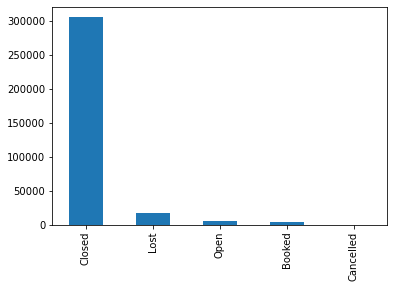

In [87]:
p1 = enquiry_df[enquiry_df['FollowUp']=='1st Follow up']['LeadStatus'].value_counts()
p1.plot.bar()

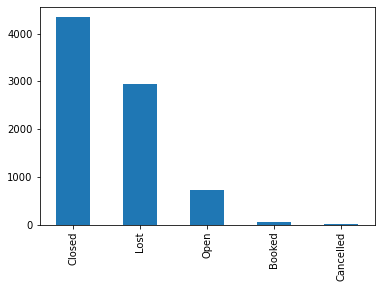

In [88]:
p2 = enquiry_df[enquiry_df['FollowUp']=='2nd Follow up']['LeadStatus'].value_counts()
p2.plot.bar()

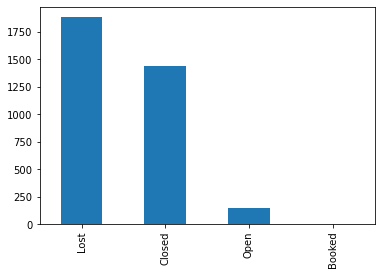

In [89]:
p3 = enquiry_df[enquiry_df['FollowUp']=='3rd Follow up']['LeadStatus'].value_counts()
p3.plot.bar()

### Data Cleaning  = FollowUpDone

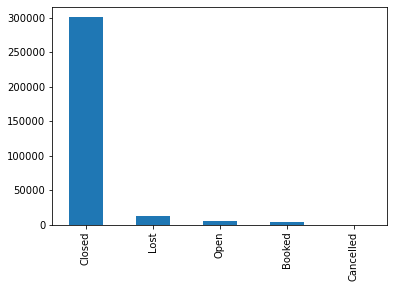

In [90]:
t1 = enquiry_df[enquiry_df['FollowUpDone']=='No']['LeadStatus'].value_counts()
t1.plot.bar()

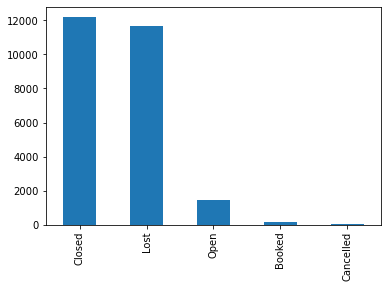

In [91]:
t2 = enquiry_df[enquiry_df['FollowUpDone']=='Yes']['LeadStatus'].value_counts()
t2.plot.bar()

### Data Cleaning = SourceOfEnquiry

In [92]:
enquiry_df['SourceOfEnquiry'].value_counts()

General Enquiry                        93323
Referral                                8686
Activity                                6847
Advertisement                           5347
Web Site                                2255
Publicity/Bike Review                   1507
Existing Customer                       1280
SMS                                      523
Facebook                                 357
Digital                                  139
Google_Brand_Broad                        86
Google_Generic_Broad                      72
TAB                                       53
Google_Competition_Exact                  40
Google_GDN_Generic                        12
Google_Generic_Exact                      10
Google_Competition_Broad                   9
Google_Brand_Exact                         8
Google_GDN_Brand                           8
GDN_banners                                7
Google_GDN_Interest                        4
Google_GDN_Competition                     3
Service Wo

In [93]:
enquiry_df.loc[enquiry_df['SourceOfEnquiry'].isna(),'SourceOfEnquiry'] = "Source Not Available"

In [94]:
enquiry_df.isna().sum()

DocName                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         345657
DOB                302985
LeadStatus              0
LeadLostReason          0
FollowUp                0
CustomerAge        297556
SourceOfEnquiry         0
FollowUpDone            0
dtype: int64

In [95]:
enquiry_df.drop()

(346835, 21)

In [99]:
enquiry_df.rename(columns= {'DocName': 'Enquiry'}, inplace=True)
print(enquiry_df.columns)

Index(['Enquiry', 'DealerCity', 'DealerState', 'BranchType', 'LeadType',
       'PaymentMode', 'State', 'City', 'Pin', 'ModelFamily', 'ModelCode',
       'TotalAmount', 'TestRideOffered', 'Occupation', 'DOB', 'LeadStatus',
       'LeadLostReason', 'FollowUp', 'CustomerAge', 'SourceOfEnquiry',
       'FollowUpDone'],
      dtype='object')


In [100]:
enquiry_df.to_csv('Cleaned Data/enquiry_df_cleaned.csv',index=False)